In [4]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import _config, _lib

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_evaluate_fitness_inference'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [5]:
# p2 only

In [6]:
## Load data

true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/out/_fitness_pt/fullgt_fitness.csv', index_col = 0)
true_df.to_csv(results_dir + f'ground_truth_fitness.csv')

true_df.head()

,Genotype,Fitness
0,..G..L........SRN.....Y....,155.893692
1,..G...V.....A.SRN.....Y....,154.018341
2,..G..G......A.SRN.....Y....,139.318253
3,..G..G........SRN.....Y....,126.900200
4,..G..V......A.SRN.....Y....,126.571991


## any

In [7]:
def plot_inferred_fitness(modelexp = 'modelexp_illumina', dataset_nm = '', out_fn = '', title = ''):
    inp_dir_g = _config.OUT_PLACE + f'g_collate_exps/'

    # Pick from /data/modelexp_x.csv, dataset col
    modelexp_design = pd.read_csv(_config.DATA_DIR + f'{modelexp}.csv')
    row = modelexp_design[modelexp_design['dataset'] == dataset_nm].iloc[0]
    nm = row['Name']

    df_fn = f'{inp_dir_g}/{modelexp}/fitness_{nm}.csv'
    df = pd.read_csv(df_fn, index_col = 0)
    
    # Parse .pdf to .csv
    csv_out_fn = '.'.join(out_fn.split('.')[:-1]) + '.csv'
    
    mdf = true_df.merge(df, on = 'Genotype')
    mdf.to_csv(f'{csv_out_fn}')
    
    from scipy.stats import pearsonr, spearmanr
    dfs = mdf.dropna()
    pr, pval = pearsonr(dfs['Fitness'], dfs['Inferred fitness'])
    spr, spval = spearmanr(dfs['Fitness'], dfs['Inferred fitness'])
    print('Pearsonr', pr, pval)
    print('Spearmanr', spr, spval)
    print('N', len(dfs))
    
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    
    fig, ax = plt.subplots(figsize = (5, 5))

    #
    sns.scatterplot(
        x = 'Fitness',
        y = 'Inferred fitness',
        data = mdf,
        linewidth = 0,
        alpha = 0.9,
        ax = ax,
    )
    sns.despine(trim = False)
    plt.grid(alpha = 0.2)
    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('Fitness calculated from full-length genotypes')
    plt.ylabel('Inferred fitness')

    ##
    
    plt.tight_layout()

    ##

    sns.despine(trim = False)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return


Pearsonr 0.7933814782171723 2.46564674306599e-14
Spearmanr 0.8046007403490216 5.633326720320025e-15
N 61
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_evaluate_fitness_inference/p2_t5_rl100.pdf ...


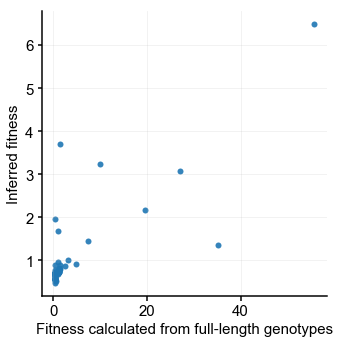

In [8]:
datagroup = 'simple'
pnum = '2'

plot_inferred_fitness(
    modelexp = f'modelexp_{datagroup}_rs', 
    dataset_nm = f'{datagroup}--pace_num-{pnum}--threshold-5--read_len-100--min_gt_frequency-0.0--proposal_type-smart',
    out_fn = results_dir + f'p{pnum}_t5_rl100.pdf', 
    title = '',
)

## reduced readlen

Pearsonr 0.8326236796696473 2.6943214007103963e-17
Spearmanr 0.8485503072196622 1.6319847743264797e-18
N 63
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_evaluate_fitness_inference/p2_t5_rl1.pdf ...


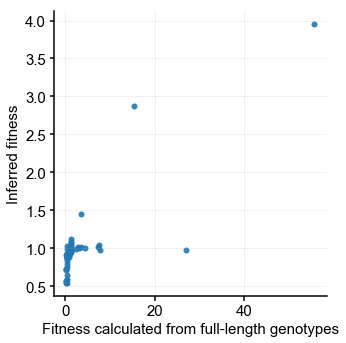

In [9]:
datagroup = 'simple'
pnum = '2'

plot_inferred_fitness(
    modelexp = f'modelexp_simple_rl_rs', 
    dataset_nm = f'simple_rl--pace_num-2--threshold-5--read_len-1--min_gt_frequency-0--proposal_type-smart',
    out_fn = results_dir + f'p2_t5_rl1.pdf', 
    title = '',
)

## added noise

Pearsonr 0.6448663646344562 3.869351446077338e-09
Spearmanr 0.8319498762870142 2.7690535639291273e-18
N 67
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_evaluate_fitness_inference/varynoise_p2_t5_rl1_noise0.03.pdf ...


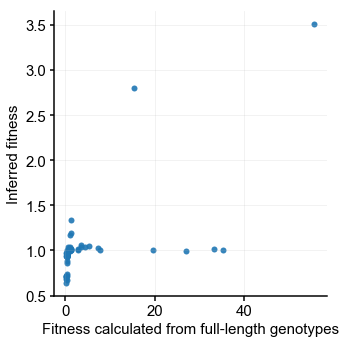

In [10]:
datagroup = 'simple'
pnum = '2'

plot_inferred_fitness(
    modelexp = f'modelexp_varynoisev2_p2_rs', 
    dataset_nm = f'varynoisev2_p2--pace_num-2--threshold-5--min_gt_frequency-0--read_len-1--noise-0.03--proposal_type-smart--noiserep-0',
    out_fn = results_dir + f'varynoise_p2_t5_rl1_noise0.03.pdf', 
    title = '',
)

Pearsonr 0.6524161224561249 7.082557095527567e-10
Spearmanr 0.8055331991951709 2.4528182800800017e-17
N 71
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_evaluate_fitness_inference/varynoise_p2_t5_rl1_noise0.05.pdf ...


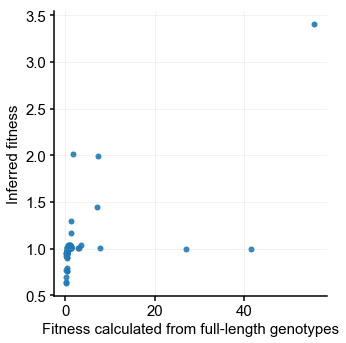

In [11]:
datagroup = 'simple'
pnum = '2'

plot_inferred_fitness(
    modelexp = f'modelexp_varynoisev2_p2_rs', 
    dataset_nm = f'varynoisev2_p2--pace_num-2--threshold-5--min_gt_frequency-0--read_len-1--noise-0.05--proposal_type-smart--noiserep-1',
    out_fn = results_dir + f'varynoise_p2_t5_rl1_noise0.05.pdf', 
    title = '',
)